In [1]:
import os
op = os.path
opd = op.dirname
os.chdir(opd(os.getcwd()))

In [2]:
from CoolLedPe4000 import COOLLED 
from Olympuslx81 import OLYMP
from matplotlib import pyplot as plt
from time import sleep
from Evolve512 import EVOLVE

In [3]:
cl = COOLLED()
ol = OLYMP()
ev = EVOLVE()

obj is {75: 'LUCPlanFlN 20x', 76: 'LUCPlanFlN 40x', 79: 'LUCPlanFlN 60x', 78: 'LUCPlanFl 40x', 31: 'PlanApo 100x O3', 70: 'PlanApo 60x O TIRFM-SP', 62: 'PlanApo 60x O/LSM', 60: 'PlanApo 40x W/LSM', 30: 'PlanApoN 60x O', 77: 'SLCPlanFl 40x', 45: 'UApo 30x 3/340', 47: 'UPlanSApo 40x', 48: 'UApo 40x W', 57: 'UPlanFlN 60x OI', 36: 'UPlanSApo 20x', 43: 'UPlanSApo 100X O', 39: 'UPlanFlN 40x O', 40: 'UPlanFlN 60x', 41: 'UPlanSApo 60x W', 42: 'UPlanApo 60x W/IR', 58: 'UPlanFlN 100x OI', 55: 'UPlanFlN 20x', 71: 'UPlanFl 40x O-SP', 56: 'UPlanFlN 40x'}
############# self.dic_obj_rev {'LUCPlanFlN 20x': 75, 'LUCPlanFlN 40x': 76, 'LUCPlanFlN 60x': 79, 'LUCPlanFl 40x': 78, 'PlanApo 100x O3': 31, 'PlanApo 60x O TIRFM-SP': 70, 'PlanApo 60x O/LSM': 62, 'PlanApo 40x W/LSM': 60, 'PlanApoN 60x O': 30, 'SLCPlanFl 40x': 77, 'UApo 30x 3/340': 45, 'UPlanSApo 40x': 47, 'UApo 40x W': 48, 'UPlanFlN 60x OI': 57, 'UPlanSApo 20x': 36, 'UPlanSApo 100X O': 43, 'UPlanFlN 40x O': 39, 'UPlanFlN 60x': 40, 'UPlanSApo 60x W

In [4]:
from time import sleep

In [ ]:
cl.ask_channels()

In [ ]:
cl.emit('CSSASF100')

In [ ]:
cl.close()

### varying the filter

In [ ]:
ol.set_shutter(shut='on')

In [ ]:
ol.set_shutter(shut='off')
ch = 'B'
for filt in range(1,6):
    ol.set_wheel_filter(filt)
    sleep(0.5)
    cl.emit(f'CSS{ch}SN001')
    ev.take_pic(f'ppp{filt}.tiff',exp_time=30)
    print(filt)
    plt.title('filter' + str(filt))
    plt.imshow(ev.frame, cmap='gray')
    plt.figure()
    cl.emit(f'CSS{ch}SF001')
    sleep(1.5)
print('finish')


### varying the delay

In [ ]:
ol.set_shutter(shut='off')
ch = 'B'
filt = 3
#ol.set_wheel_filter(filt)
sleep(0.5)
for delay in range(3):
#for filt in range(1,6):
    #ol.set_wheel_filter(filt)
    sleep(0.5)
    cl.emit(f'CSS{ch}SN001')
    sleep(delay*0.0001)
    ev.take_pic(f'gfp{delay}.tiff',exp_time=100)
    plt.title(str(delay))
    plt.imshow(ev.frame, cmap='gray')
    plt.figure()
    sleep(1)
    cl.emit(f'CSS{ch}SF001')
print('finish')

### test simple RFP

In [ ]:
zpos = ol.ask_zpos()
print(zpos)

In [ ]:
ol.set_zpos(773100)

In [ ]:
# RFP
ol.set_shutter(shut='off')
ch = 'C'
filt = 5
num = 0
intens = 75
#cl.load_wave_length(580)
ol.set_wheel_filter(filt)
sleep(0.5)
cl.emit(f'CSS{ch}SN{str(intens).zfill(3)}')
ev.take_pic(f'rfp_{num}_{filt}.tiff', exp_time=30)
print(filt)
plt.title('filter' + str(filt))
plt.imshow(ev.frame, cmap='gray')
plt.figure()
cl.emit(f'CSS{ch}SF{str(intens).zfill(3)}')

print('finish')


### test simple GFP

In [ ]:
ol.set_shutter(shut='off')
ch = 'B'
filt = 3
num = 0
intens = 75
ol.set_wheel_filter(filt)
sleep(0.5)
cl.emit(f'CSS{ch}SN{str(intens).zfill(3)}')
ev.take_pic(f'gfp_{num}_{filt}.tiff',exp_time=30)
print(filt)
plt.title('filter' + str(filt))
plt.imshow(ev.frame, cmap='gray')
plt.figure()
cl.emit(f'CSS{ch}SF{str(intens).zfill(3)}')

print('finish')

### test BF

## set_shutter answer is 1LOG +
1SH
self.frame.max() in 16 bits 986
self.frame.max() in 8 bits 256.0


<Figure size 432x288 with 0 Axes>

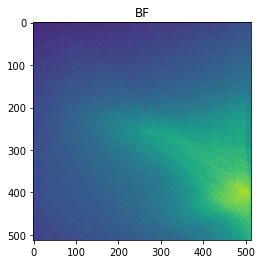

<Figure size 432x288 with 0 Axes>

In [5]:
ol.set_shutter(shut='on')
ol.set_wheel_filter(1)
sleep(2)
ev.take_pic('BF_pic.png', bpp=8, exp_time=500) 
plt.title('BF')
plt.imshow(ev.frame)
plt.figure()

In [ ]:
ol.ask_shutter()

In [ ]:
zpos = ol.ask_zpos()
print(zpos)

In [ ]:
ol.set_zpos(769100)